# Research on car sales ads

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day.

You need to study data collected over the last few years and determine which factors influence the price of a vehicle. 

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

cars = pd.read_csv('/datasets/vehicles_us.csv')

print(cars.info())
print(cars.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None
   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0

### Conclusion

- Missing some model_year, cylinders, & odometer values. These values should also be converted to ints
- Missing some paint_color values
- NaN values in is_4wd should be changed to 0. Also converted to ints
- date_posted is in yyyy-mm-dd format, will likely need to convert in order to use this variable
- Will analyze columns with missing data and find the best method to fill these values.

### Step 2. Data preprocessing

[nan 'white' 'red' 'black' 'blue' 'grey' 'silver' 'custom' 'orange'
 'yellow' 'brown' 'green' 'purple']


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64


0

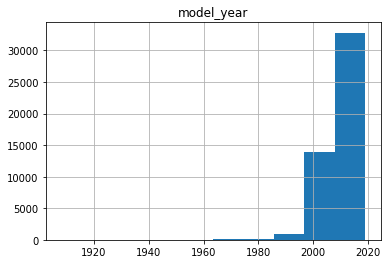

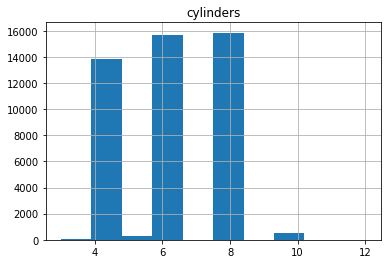

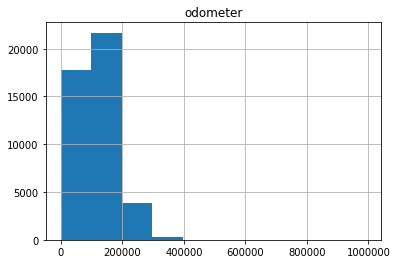

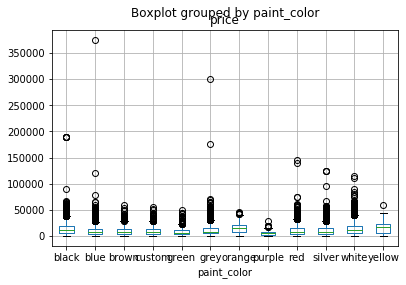

In [2]:
#Checked to make sure price was all positive values. This column looks good. 
cars['price'].describe()

#Check out model_year description to help decide what to do with the empty values
cars['model_year'].describe()
cars.hist('model_year')
#Years range between 1908 to 2019.  1908 is likely one of several outliers 
#Most of the data is between 2006 to 2014. There aren't many missing values
#Changing them shouldn't greatly alter the conclusions. 
#Since there are a few outliers which affect the mean, I will fill in the values with the median & change to int. 
cars['model_year'] = cars['model_year'].fillna(2011).astype('int')

#Check cylinders description to help decide how to fill empty values
cars['cylinders'].describe()
cars.hist('cylinders')
#The mean is just over 6 & the median is 6.  Cyclinders only come in whole numbers.  Filling with 6 & change to int. 
cars['cylinders'] = cars['cylinders'].fillna(6).astype('int')


#Check odometer description
cars['odometer'].describe()
cars.hist('odometer')
#Range is from 0 to 990,000 with most values between 70,000-155,000. Seems like there are many outliers.  
#Replacing NaN with median values
cars['odometer'] = cars['odometer'].fillna(113000).astype('int')

#Checking the different paint colors in the dataset
print(cars['paint_color'].unique())
cars.boxplot(column='price', by='paint_color')
#There is no way to know the missing values at this time.
cars['paint_color'] = cars['paint_color'].fillna('NA')

#It can probably be assumed that the missing values should be zero. Filled in zeros & changed to ints
cars['is_4wd'] = cars['is_4wd'].fillna(0).astype('int')

#Double checking all NaN values, except for paint_color are gone! 
print(cars.isnull().sum())

#Checking there are no duplicated rows. All good here. 
cars.duplicated().sum()

#For my own curiosity: checking all model types are uniform/ commented out for ease of reading
#model_sort = cars.sort_values('model')
#model_sort['model'].unique()
#models could be better categorized. For example 'ford-f250 sd' & 'ford f-250 super duty' are probably the same thing
#Would also be interesting to separate the make and model to analyze data. 

### Conclusion

- Most of the car model years are fairly new (less than 10 years old). The missing values were changed to the median value of 2011. However, there are other factors that could have been taken into consideration before changing these values.  For example, deleting these values entirely probably wouldn't have had an adverse effect on the data as it was only a small percentage of the total data. We could have also analyzed these specific lines with the missing data and used other information to come to a more accurate conclusion.  We could have taken into account the car's condition and/or mileage before filling in a value (A car with 5000 miles in new condition is probably not from 2011).  

- For cylinders, like with model years, if we deleted just the rows with missing cylinder data it probably wouldn't have a large effect on our end conclusions. Again we could have also analyzed those rows more carefully and potentially come up with other solutions to fill the missing data.  For example, we could've looked futher into the specific model types to research whether certain vehicles even offer 6 or 8 cylinder options.  

- There are many missing odometer values with most falling in the 100,000 and 200,000 bin.  There are a lot of outliers in this column which will affect the mean data, this is why it was replaced with the median data.  Again, there could be more specific ways to analyze this column if it called for it.  For example a vehicle in new condition probably doesn't have over 100,000 miles on it.

- Almost 1/5 of the data for paint color is missing. Unless we go back to whoever collected the data to try to find the missing information, there's really not a good way to determine what these missing values should be. In this case, I've decided to fill the missing data with the string 'NA' 

- Almost half of the data for is_4wd is missing but it can be assumed that if there is not a 1 in the column indicating 4wd then the missing values can be considered a 0.  

### Step 3. Make calculations and add them to the table

In [3]:
#convert date_posted with datetime
cars['date_posted'] = pd.to_datetime(cars['date_posted'], format='%Y-%m-%d')
#add column for weekday posted
cars['weekday_posted'] = cars['date_posted'].dt.weekday
#add column for month posted
cars['month_posted'] = pd.DatetimeIndex(cars['date_posted']).month
#add column for year posted
cars['year_posted'] = pd.DatetimeIndex(cars['date_posted']).year
#calculate vehicle age when posted
cars['vehicle_age'] = cars['year_posted'] - cars['model_year'] 
#calculate average mileage
cars['avg_mileage_per_year'] = cars['odometer'] / cars['vehicle_age']

# creating a dictionary  
condition = {'new' : 5, 'like new' : 4, 'excellent': 3, 'good':2, 'fair': 1 , 'salvage': 0} 
  
# create loop to replace string with dictionary pair
cars['condition'] = [condition[item] for item in cars['condition']] 
cars.head(4)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age,avg_mileage_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,NA,1,2018-06-23,19,5,6,2018,7,20714.285714
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,NA,0,2019-03-22,9,4,3,2019,16,7062.500000


### Conclusion

- Creating a dictionary & loop to replace the condition values seemed like the easiest & quickest way to change the string in the condition column to a number though there are several methods that could have accomplished the same thing.  

### Step 4. Carry out exploratory data analysis

count    43208.000000
mean        39.541057
std         28.221260
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

                    price  count
type                            
sedan         7156.594732  11427
SUV          10617.116687  10841
truck        15297.892041   9235
pickup       15163.482772   5282
coupe        14299.000000   1834
wagon         9359.621739   1380
mini-van      8372.204524   1061
hatchback     7012.214511    951
van           8708.967245    519
convertible  13305.124590    305
other        10374.990698    215
offroad      15169.212903    155
bus          21826.666667      3

Correlation between price & count:  -0.15568215889694162
             count
paint_color       
NA            4001
black         3625
silver        3365
white         3129
grey          2589
blue          2080
red           1671
brown          558
green          526
custom         520
orange  

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


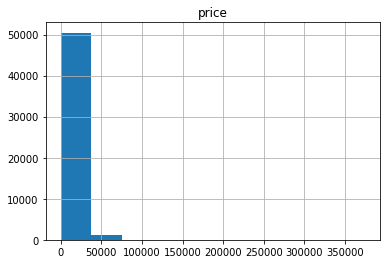

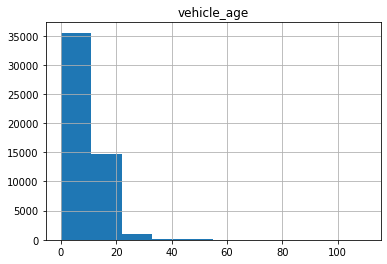

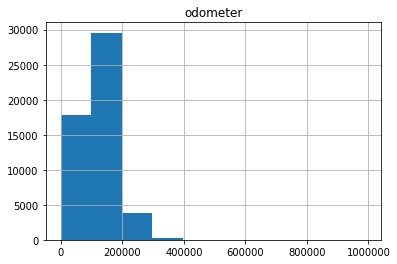

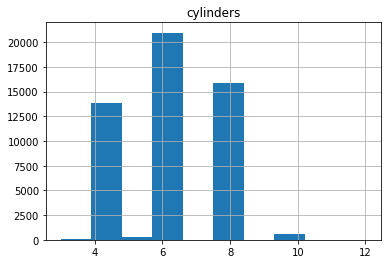

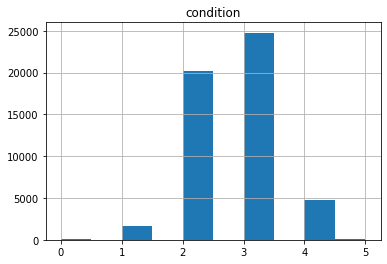

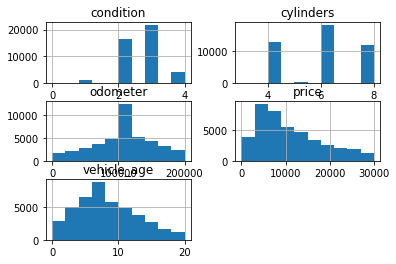

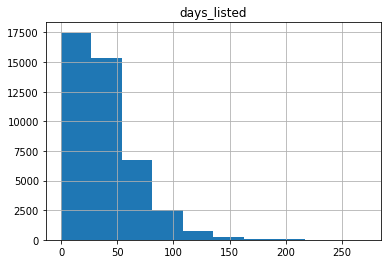

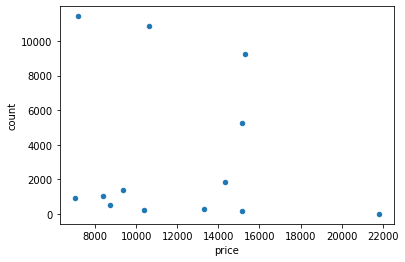

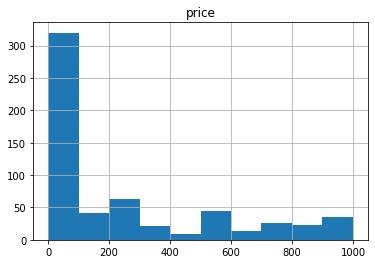

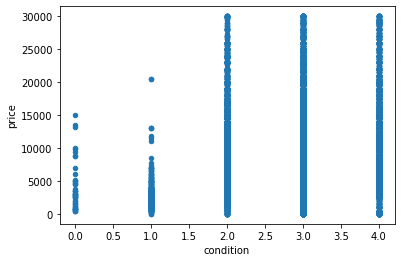

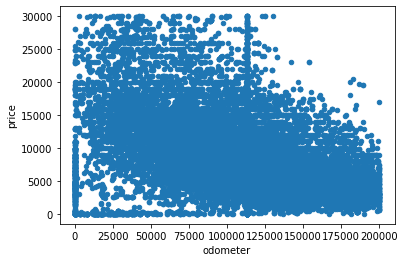

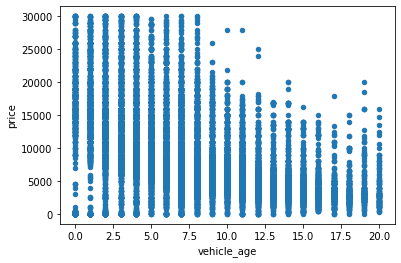

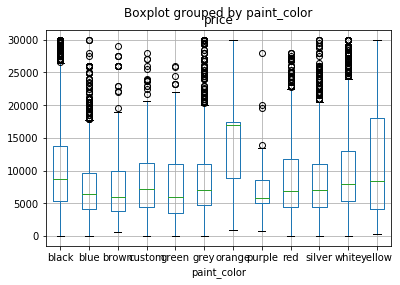

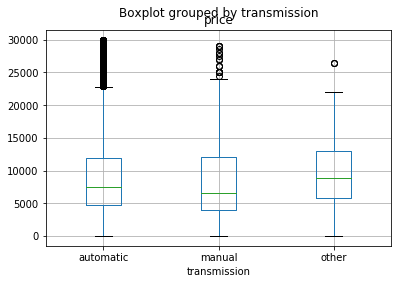

In [4]:
#Checking histogram of each requested variable
cars.hist('price')
#Almost all prices are less than 30,000 with a few outliers skewing the data. 
#Can get a closer look at the outliers with the range. Commented out for ease of reading
#cars.hist('price', range=(30001, 375000))
#cars.hist('price', range=(0, 30000))

cars.hist('vehicle_age')
#Almost all vehicles are less than 20 years old with a few outliers     

cars.hist('odometer')
#Almost all vehicles have less than 200,000 miles 
    
cars.hist('cylinders')
#Nearly all vehicles have 8 cyclinders or less

cars.hist('condition')
#Almost all conditions are between 1 and 4. 

cars_filtered = cars.query('price <= 30000 and vehicle_age <= 20 and odometer <= 200000 and cylinders <=8 and condition <=4')
#cars_filtered.info()
#Removed approximately 8000 rows from the data which included at least one outlier in the selected columns


cars_filtered_select = cars_filtered[['price', 'vehicle_age', 'odometer', 'cylinders', 'condition']]
cars_filtered_select.hist()


cars_filtered.hist('days_listed')
#Cars were generally sold within the first 60 days. 
#Even within the filtered data, there are still outliers in the days_listed column

print(cars_filtered['days_listed'].describe())
#Mean: 33
#Median: 39.541057
#Half of the cars were sold by day 33
#Any car sold after day 53 could be considered abnormal
cars_filtered['days_listed'].quantile(.9)
#Any car sold after day 77 would be extremely rare. Using this data, cars are listed for up to 271 days. 
print()
#Finding the average price and number of ads by vehicle type
ads_by_type = cars_filtered.pivot_table(index='type', values='price', aggfunc=['mean', 'count'])
ads_by_type.columns = ['price', 'count']
print(ads_by_type.sort_values('count', ascending=False))
#Sedans & SUVs have the greatest number of ads
print()
print('Correlation between price & count: ', ads_by_type['price'].corr(ads_by_type['count']))
#Correlation is fairly low

ads_by_type.plot(x='price', y='count', kind='scatter')

#analyzing types with most ads. Filtering only sedan & SUV data
sedans_SUV = cars_filtered.query('type in("sedan", "SUV")')

cars_low_price = sedans_SUV.query('price < 1000')
cars_low_price.hist('price')

#Plot by condition
sedans_SUV_condition = sedans_SUV.plot(x='condition', y='price', kind='scatter')
#As expected, salvage & fair conditions are priced low
#Other conditions are fairly even

#plot by mileage
sedans_SUV_odometer = sedans_SUV.plot(x='odometer', y='price', kind='scatter')
#Generally the higher the mileage, the lower the price

#plot by vehicle age
sedans_SUV_age = sedans_SUV.plot(x='vehicle_age', y='price', kind='scatter')
#Generally the older the car, the lower the price

#Get count of each paint color to make sure there is more than 50.  
sedans_SUV_color = sedans_SUV.pivot_table(index='paint_color', values='price', aggfunc='count')
sedans_SUV_color.columns=['count']
print(sedans_SUV_color.sort_values('count', ascending=False))
#All regular colors are more than 50.  Will take out NA values
sedans_SUV_color_filtered = sedans_SUV.query('paint_color not in "NA"')
sedans_SUV_color_box = sedans_SUV_color_filtered.boxplot(column='price', by='paint_color')
#I'm assuming I'm getting a VisibleDeprecationWarning from comparing an object with an int, but not sure how to fix it
#Orange paint colors have a higher median price than the other colors
#Green & brown cars are the lowest priced
#Blue & Grey colors have many high priced outliers

sedans_SUV_transmission = sedans_SUV.boxplot(column='price', by='transmission')
#Other transmission is highest priced

### Conclusion

- Once the high outliers are taken out, the histograms are a lot easier to read and interpret.  
- There doesn't seem to be much correlation between the number of ads for each vehicle type and the price
- Sedans and SUVs have the greatest number of ads with about half of total number of non-outlier data. 
- The results are what would be expected: age, high mileage, and poor condition generally means a lower price.  
- I don't know much about cars as I thought the only transmission options were manual or automatic.  However, 'other' transmission has the highest median price.  
- Some of the pricing data is likely incorrect with a few hundred rows containing prices of less than $200 as shown in one of the hisograms above. 

### Step 5. Overall conclusion

- As expected, vehicles that are newer, in better condition, with fewer miles tend to be the most expensive
- I was probably most surprised to see high prices for SUVs and sedans with orange paint colors, mostly because I don't see orange cars of those types very frequently in daily life. 
- In all of the scatterplots, it is clear that there is most likely an error in the price column.  It's highly doubtful that a new car with no miles would be selling for nearly nothing.  
- As noted above, it would be interesting to see how different makes or models play into pricing as well (domestic or foreign, for example)
- It would also be interesting to analyze the outliers.  For example, at what point does the car's age make the price increase (a classic car, for example)
- Dates weren't analzyed either.  Could be worth looking into whether cars sold more frequently or for higher prices during certain months of the year.